# 实验一：图像处理

## 第一部分：直方图均衡

### 实验内容：编写并验证直方图均衡算法的代码

### 实验步骤：
#### 第一步：打开`HistogramEqualization.py`，编写`Equalization_Histogram()`函数并测试函数能否顺利运行
#### 第二步：测试通过后，可以将你的`Equalization_Histogram()`函数的运行结果与`cv2.equalizeHist()`函数的运行结果做比较，如果差别极小，则说明你的函数是正确的
#### 第三步：下方代码调用了你刚刚编写的`Equalization_Histogram()`函数，修改下方代码，获得任意三张来自`./png_files/1`文件夹中的人脸图片的直方图均衡效果、以及均衡前后的直方图，并将相应的图片填入实验报告中去
#### 注意：
1. 生成直方图前，请修改`plt.title('fill in your student number')`，使得直方图的标题为你小组两名成员的学号
2. `Equalization_Histogram()`函数不可套用`cv2.equalizeHist()`函数，如果套用，会损失相应实验分数
3. 可以上网搜索代码，但是不可以抄袭他组代码
4. 需要上交的文件：实验报告+`HistogramEqualization.py`；该notebook不用上交
5. 评分细则详见评分标准文档

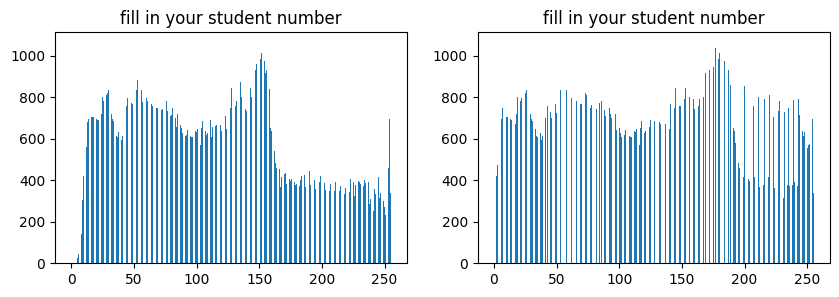

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from HistogramEqualization import Equalization_Histogram

# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0,256):
        hist.append(img.count(i))
    return hist

image_path = './png_files/1/FILE14.png'   # 待读图片的相对路径
cv2.namedWindow("Original Image", 0)   # 使用cv2打开一个用于显示图片的窗口（仅仅打开，还未显示），窗口的名字叫"Original Image"，0代表没有固定size
cv2.namedWindow("Hist-Equalized Image", 0)

image = cv2.imread(image_path, 0)   # 将图片读入内存，参数0代表读入图片并将图片转换为单通道图片
image_hist = GetHist(image)   # 使用自己写的函数来计算一下图片的直方图

# 直方图均衡
equ = Equalization_Histogram(image)
equ_hist = GetHist(equ)

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.bar(x=range(0, 256), height=image_hist, width=0.5)
plt.title('fill in your student number')   # 更改这一行，使得稍后在显示你的直方图时，图片的标题会变成你的学号

plt.subplot(122)
plt.bar(x=range(0, 256), height=equ_hist, width=0.5)
plt.title('fill in your student number')   # 更改这一行，使得稍后在显示你的直方图时，图片的标题会变成你组员的学号
plt.show()

cv2.imshow("Original Image", image)
cv2.imshow("Hist-Equalized Image", equ)   # 分别显示图片到相应的窗口中去

cv2.waitKey(0)

cv2.destroyAllWindows()

### `Equalization_Histogram()`编程提示

#### 1. 已知直方图均衡的公式如下（其中，$D_B$为转换后的灰度，$D_A$为原图像灰度，$D_m$为灰度级，$A_0$为图像像素总数，$H_A(D_A)$为$D_A$灰度所对应的像素点个数）

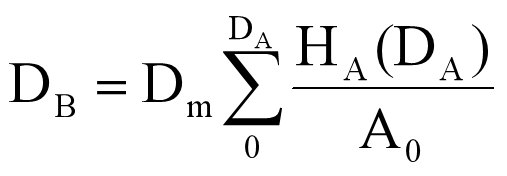

#### 2. 假设原图像尺寸为32×32，$D_m = 256$，$H_A(0) = 100$，$H_A(1) = 150$那么：

①. 当$D_A = 0$时，$D_B = 256 * \frac{H_A(0)}{图像宽*图像高} = 256 * \frac{100}{1024} = 25 $

②. 当$D_A = 1$时，$D_B = 256 * (\frac{H_A(0)}{图像宽*图像高} + \frac{H_A(1)}{图像宽*图像高}) = 256 * (\frac{100}{1024} + \frac{150}{1024}) = 62.5 $

③. ......

也就是说，原始图像中所有灰度值为0的像素点，经过直方图均衡后，灰度值会变为25；原始图像中所有灰度值为1的像素点，经过直方图均衡后，灰度值会变为62（向下取整）


#### 3. 不知道怎么获得一张图像的宽和高？

In [4]:
import cv2

image_path = './png_files/1/FILE10.png'
image = cv2.imread(image_path, 0)

print(image.shape[0:2])

(384, 384)


#### 4. 不知道怎么创建一幅和原图像尺寸一模一样的空图像？ 

In [6]:
import cv2
import numpy as np

image_path = './png_files/1/FILE10.png'
image = cv2.imread(image_path, 0)

new_img = np.zeros(shape=(image.shape[0], image.shape[1]), dtype=np.uint8)
print(new_img.shape)

(384, 384)
